In [1]:
# import the dependencies 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

620

In [6]:
import requests 
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a77414ceb13dc7b7f8781106de8688af


In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a77414ceb13dc7b7f8781106de8688af&q=Boston


In [9]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [10]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
city_weather

<Response [404]>

In [11]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [12]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":802,"main":"Clouds","description":"scattered clouds","icon":"03d"}],"base":"stations","main":{"temp":39.33,"feels_like":28.92,"temp_min":37.99,"temp_max":41,"pressure":1020,"humidity":41},"visibility":10000,"wind":{"speed":9.22,"deg":320},"clouds":{"all":40},"dt":1610302503,"sys":{"type":1,"id":3486,"country":"US","sunrise":1610280748,"sunset":1610314252},"timezone":-18000,"id":4930956,"name":"Boston","cod":200}'

In [13]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 39.33,
  'feels_like': 28.92,
  'temp_min': 37.99,
  'temp_max': 41,
  'pressure': 1020,
  'humidity': 41},
 'visibility': 10000,
 'wind': {'speed': 9.22, 'deg': 320},
 'clouds': {'all': 40},
 'dt': 1610302503,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1610280748,
  'sunset': 1610314252},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [14]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [15]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.json():
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [16]:
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a77414ceb13dc7b7f8781106de8688af&q=Boston


In [17]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'stations',
 'main': {'temp': 39.33,
  'feels_like': 28.92,
  'temp_min': 37.99,
  'temp_max': 41,
  'pressure': 1020,
  'humidity': 41},
 'visibility': 10000,
 'wind': {'speed': 9.22, 'deg': 320},
 'clouds': {'all': 40},
 'dt': 1610302503,
 'sys': {'type': 1,
  'id': 3486,
  'country': 'US',
  'sunrise': 1610280748,
  'sunset': 1610314252},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [18]:
# Get the JSON data.
boston_data = city_weather.json()

In [19]:
boston_data["sys"]

{'type': 1,
 'id': 3486,
 'country': 'US',
 'sunrise': 1610280748,
 'sunset': 1610314252}

In [20]:
boston_data["sys"]["country"]

'US'

In [21]:
boston_data["dt"]

1610302503

In [22]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)

42.3584 -71.0598 41 41 40 9.22


In [23]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2021-01-10 18:15:03'

In [24]:

# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [25]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")



Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | tuatapere
Processing Record 4 of Set 1 | bengkulu
Processing Record 5 of Set 1 | klaksvik
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | tabou
Processing Record 8 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 9 of Set 1 | albany
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | broken hill
Processing Record 12 of Set 1 | georgetown
Processing Record 13 of Set 1 | nacala
Processing Record 14 of Set 1 | kodiak
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | jiayuguan
Processing Record 17 of Set 1 | biggar
Processing Record 18 of Set 1 | puerto ayora
Processing Record 19 of Set 1 | butaritari
Processing Record 20 of Set 1 | port alfred
Processing Record 21 of Set 1 | kapaa
Processing Record 22 of Set 1 | alofi
Processing Record 23 of Set 1 | samusu
City not found. Skipping...
Proc

City not found. Skipping...
Processing Record 38 of Set 4 | kurilsk
Processing Record 39 of Set 4 | raudeberg
Processing Record 40 of Set 4 | songea
Processing Record 41 of Set 4 | skalistyy
City not found. Skipping...
Processing Record 42 of Set 4 | sistranda
Processing Record 43 of Set 4 | abu kamal
Processing Record 44 of Set 4 | krasnoselkup
Processing Record 45 of Set 4 | korla
Processing Record 46 of Set 4 | kattivakkam
Processing Record 47 of Set 4 | antofagasta
Processing Record 48 of Set 4 | lompoc
Processing Record 49 of Set 4 | ahipara
Processing Record 50 of Set 4 | bambui
Processing Record 1 of Set 5 | mao
Processing Record 2 of Set 5 | acapulco
Processing Record 3 of Set 5 | ixtapa
Processing Record 4 of Set 5 | carnarvon
Processing Record 5 of Set 5 | mar del plata
Processing Record 6 of Set 5 | kitimat
Processing Record 7 of Set 5 | souillac
Processing Record 8 of Set 5 | pisco
Processing Record 9 of Set 5 | qasigiannguit
Processing Record 10 of Set 5 | adrar
Processing

Processing Record 26 of Set 8 | skagastrond
City not found. Skipping...
Processing Record 27 of Set 8 | nouadhibou
Processing Record 28 of Set 8 | san-pedro
Processing Record 29 of Set 8 | dzhusaly
City not found. Skipping...
Processing Record 30 of Set 8 | beira
Processing Record 31 of Set 8 | hachinohe
Processing Record 32 of Set 8 | saint george
Processing Record 33 of Set 8 | severo-kurilsk
Processing Record 34 of Set 8 | evensk
Processing Record 35 of Set 8 | rock sound
Processing Record 36 of Set 8 | bathsheba
Processing Record 37 of Set 8 | khatanga
Processing Record 38 of Set 8 | adolfo lopez mateos
Processing Record 39 of Set 8 | samana
Processing Record 40 of Set 8 | neuquen
Processing Record 41 of Set 8 | sinjai
Processing Record 42 of Set 8 | clyde river
Processing Record 43 of Set 8 | kerema
Processing Record 44 of Set 8 | kavieng
Processing Record 45 of Set 8 | zvishavane
Processing Record 46 of Set 8 | belgrade
Processing Record 47 of Set 8 | amazar
Processing Record 48 

Processing Record 10 of Set 12 | lukulu
Processing Record 11 of Set 12 | tornio
Processing Record 12 of Set 12 | comodoro rivadavia
Processing Record 13 of Set 12 | muzhi
Processing Record 14 of Set 12 | palora
Processing Record 15 of Set 12 | hofn
Processing Record 16 of Set 12 | cascais
Processing Record 17 of Set 12 | marzuq
Processing Record 18 of Set 12 | mayo
Processing Record 19 of Set 12 | pangody
Processing Record 20 of Set 12 | kapoeta
Processing Record 21 of Set 12 | asau
Processing Record 22 of Set 12 | moron
Processing Record 23 of Set 12 | praia da vitoria
Processing Record 24 of Set 12 | sao felix do xingu
Processing Record 25 of Set 12 | albacete
Processing Record 26 of Set 12 | sande
Processing Record 27 of Set 12 | algiers
Processing Record 28 of Set 12 | changchun
Processing Record 29 of Set 12 | la ronge
Processing Record 30 of Set 12 | bilibino
Processing Record 31 of Set 12 | mazamari
Processing Record 32 of Set 12 | aginskoye
Processing Record 33 of Set 12 | zhit

In [96]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Yellowknife,62.4560,-114.3525,-2.20,84,75,6.91,CA,2021-01-10 18:25:15
1,Cape Town,-33.9258,18.4232,69.01,56,20,23.02,ZA,2021-01-10 18:21:34
2,Tuatapere,-46.1333,167.6833,55.00,71,66,8.99,NZ,2021-01-10 18:25:15
3,Bengkulu,-3.8004,102.2655,76.66,85,100,4.83,ID,2021-01-10 18:25:15
4,Klaksvik,62.2266,-6.5890,32.00,64,75,9.22,FO,2021-01-10 18:25:15
5,Punta Arenas,-53.1500,-70.9167,50.00,62,75,23.02,CL,2021-01-10 18:25:15
6,Tabou,4.4230,-7.3528,81.18,81,30,7.38,CI,2021-01-10 18:25:15
7,Albany,42.6001,-73.9662,28.00,70,75,1.99,US,2021-01-10 18:24:41
8,Rikitea,-23.1203,-134.9692,77.74,78,99,15.32,PF,2021-01-10 18:25:16
9,Broken Hill,-31.9500,141.4333,73.40,31,0,5.75,AU,2021-01-10 18:25:16


In [97]:
#reorder columns 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2021-01-10 18:25:15,62.4560,-114.3525,-2.20,84,75,6.91
1,Cape Town,ZA,2021-01-10 18:21:34,-33.9258,18.4232,69.01,56,20,23.02
2,Tuatapere,NZ,2021-01-10 18:25:15,-46.1333,167.6833,55.00,71,66,8.99
3,Bengkulu,ID,2021-01-10 18:25:15,-3.8004,102.2655,76.66,85,100,4.83
4,Klaksvik,FO,2021-01-10 18:25:15,62.2266,-6.5890,32.00,64,75,9.22
...,...,...,...,...,...,...,...,...,...
555,Huarmey,PE,2021-01-10 18:27:23,-10.0681,-78.1522,76.42,67,4,11.41
556,Orinda,US,2021-01-10 18:27:23,37.8772,-122.1797,53.01,71,75,4.61
557,Fairbanks,US,2021-01-10 18:27:23,64.8378,-147.7164,14.00,85,40,5.75
558,Arman,RU,2021-01-10 18:27:23,59.7000,150.1667,-0.99,84,100,9.19


In [98]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [99]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [100]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1610303678.397138

In [101]:
today = time.strftime("%x")
today

'01/10/21'

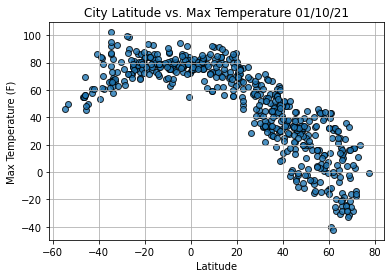

In [102]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

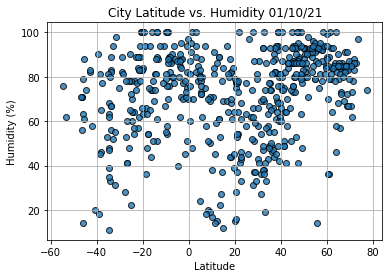

In [131]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

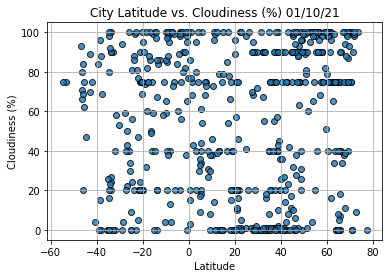

In [132]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

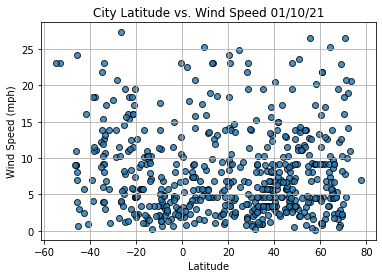

In [133]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [106]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

# Import linregress
    from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [107]:
index13 = city_data_df.loc[13]
index13 


City                      Ushuaia
Country                        AR
Date          2021-01-10 18:25:03
Lat                         -54.8
Lng                         -68.3
Max Temp                     46.4
Humidity                       76
Cloudiness                     75
Wind Speed                  23.02
Name: 13, dtype: object

In [108]:
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4       True
       ...  
555    False
556     True
557     True
558     True
559     True
Name: Lat, Length: 560, dtype: bool

In [109]:
#return a dataframe with all data fitting the criteria for lats greate than or equal to zero 
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Yellowknife,CA,2021-01-10 18:25:15,62.4560,-114.3525,-2.20,84,75,6.91
4,Klaksvik,FO,2021-01-10 18:25:15,62.2266,-6.5890,32.00,64,75,9.22
6,Tabou,CI,2021-01-10 18:25:15,4.4230,-7.3528,81.18,81,30,7.38
7,Albany,US,2021-01-10 18:24:41,42.6001,-73.9662,28.00,70,75,1.99
10,Georgetown,MY,2021-01-10 18:25:16,5.4112,100.3354,81.00,73,20,4.61
...,...,...,...,...,...,...,...,...,...
554,Deer Lake,CA,2021-01-10 18:27:22,49.1667,-57.4316,33.80,86,90,9.22
556,Orinda,US,2021-01-10 18:27:23,37.8772,-122.1797,53.01,71,75,4.61
557,Fairbanks,US,2021-01-10 18:27:23,64.8378,-147.7164,14.00,85,40,5.75
558,Arman,RU,2021-01-10 18:27:23,59.7000,150.1667,-0.99,84,100,9.19


In [110]:
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

In [111]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] <= 0)]

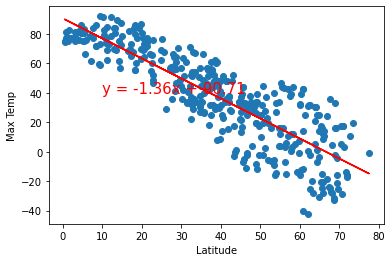

In [112]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

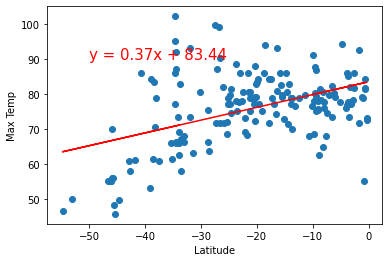

In [113]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

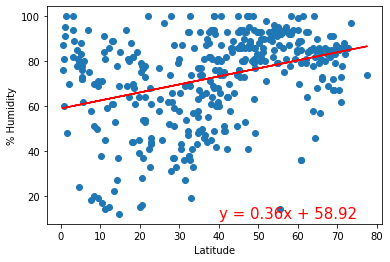

In [114]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

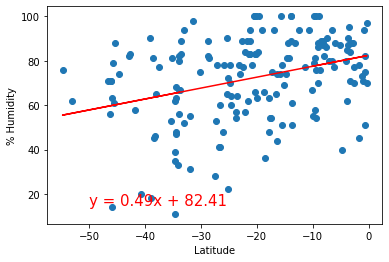

In [115]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

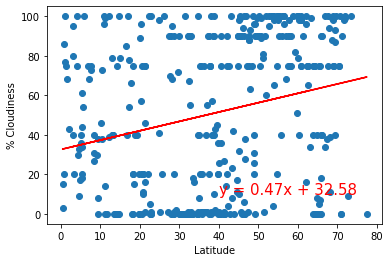

In [116]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

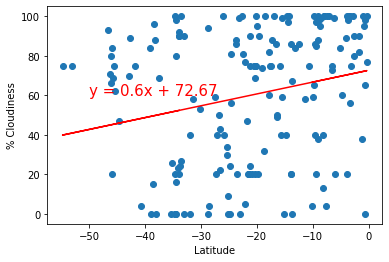

In [117]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

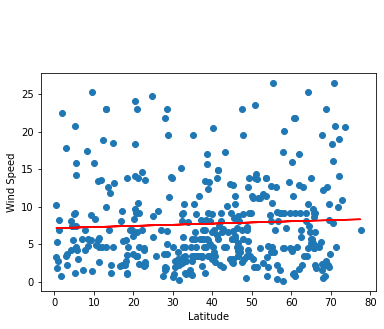

In [118]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

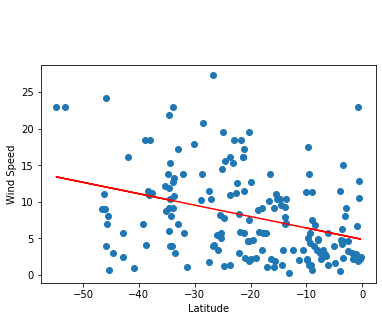

In [119]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [120]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config import g_key

In [121]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("weather_data/cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Yellowknife,CA,2021-01-10 18:25:15,62.4560,-114.3525,-2.20,84,75,6.91
1,1,Cape Town,ZA,2021-01-10 18:21:34,-33.9258,18.4232,69.01,56,20,23.02
2,2,Tuatapere,NZ,2021-01-10 18:25:15,-46.1333,167.6833,55.00,71,66,8.99
3,3,Bengkulu,ID,2021-01-10 18:25:15,-3.8004,102.2655,76.66,85,100,4.83
4,4,Klaksvik,FO,2021-01-10 18:25:15,62.2266,-6.5890,32.00,64,75,9.22


In [122]:
city_data_df.dtypes

City_ID         int64
City           object
Country        object
Date           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity        int64
Cloudiness      int64
Wind Speed    float64
dtype: object

In [128]:
# Configure gmaps to use your Google API key.
gmaps.configure(api_key=g_key)

In [130]:
# Heatmap of temperature
# Get the latitude and longitude.
locations = city_data_df[["Lat", "Lng"]]
# Get the maximum temperature.
max_temp = city_data_df["Max Temp"]
# Assign the figure variable.
fig = gmaps.figure()
# Assign the heatmap variable.
heat_layer = gmaps.heatmap_layer(locations, weights = max_temp)
# Add the heatmap layer.
fig.add_layer(heat_layer)
# Call the figure to plot the data.
fig

InvalidWeightException: -2.2 is not a valid weight. Weights must be non-negative.